In [135]:
import pandas as pd
import matplotlib as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Informasi terkait tabel:


1. user_name	= The name of the user, as they’ve defined it.

2. user_location =	The user-defined location for this account’s profile.

3. user_description =	The user-defined UTF-8 string describing their account.

4. user_created =	Time and date, when the account was created.

5. user_followers =	The number of followers an account currently has.

6. user_friends =	The number of friends an account currently has.

7. user_favourites =	The number of favorites an account currently has

8. user_verified =	When true, indicates that the user has a verified account

9. date =	UTC time and date when the Tweet was created

10. text =	The actual UTF-8 text of the Tweet

11. hashtags =	All the other hashtags posted in the tweet along with #Bitcoin & #btc

12. source =	Utility used to post the Tweet, Tweets from the Twitter website have a source value - web

13. is_retweet =	Indicates whether this Tweet has been Retweeted by the authenticating user.

# DATA LOADING

In [136]:
df = pd.read_csv('Bitcoin_tweets.csv')

In [137]:
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573250,Captain Crytpo,NaN,There's a new social order aligning. This is ...,2021-03-06 13:47:42,50.0,103.0,2086.0,False,2022-03-14 19:37:32,This should tell you plenty. DO NOT hold pape...,['BTC'],Twitter for Android,False
2573251,nadya,KİEV,BİTC0İN\n\nCAN U SEND GİFT PLS F0R WAR :(\n\nI...,2022-03-14 19:29:12,0.0,0.0,0.0,False,2022-03-14 19:37:32,TEwL3iCv1Xyn3Vr7C6CHMqdS36ixA6QWvc\n\ncan you ...,"['Bitcoin', 'bitcoins', 'BTC']",Twitter Web App,False
2573252,Crypto Cobra,NaN,OVER 100K FOLLOWERS ON TELEGRAM https://t.co/R...,2021-08-29 04:38:25,2105.0,68.0,34.0,False,2022-03-14 19:37:28,#TOP01 LOSSER LIST TODAY 14/03/22 📢\n\n#IMX/US...,"['TOP01', 'IMX', 'BTC', 'Binance', 'Coinbase',...",Twitter for iPhone,False
2573253,Cryptonia,NaN,🤖 #crypto #trading,2017-09-22 10:00:27,420.0,137.0,5568.0,False,2022-03-14 19:37:26,I am the only crazy person here? \n\n#btc #alts,"['btc', 'alts']",Twitter for iPhone,False


Data ada emoticon, ada hastag , ada url dan ada \n\.
mungkin yang berhubungan dengan user yang perlu dipake cuman followers sama verified dan tanggal tweet dibuat

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573255 entries, 0 to 2573254
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 255.2+ MB


semuanya object dan hanya followers saja yang float. jika dilihat dari tabel, friends dan favourites seharusnya terbaca float

In [139]:
df.isnull().sum()

user_name                31
user_location       1261627
user_description     318865
user_created            178
user_followers          225
user_friends            225
user_favourites         225
user_verified           225
date                    225
text                    225
hashtags              17263
source                 3845
is_retweet              531
dtype: int64

semuanya punya missing values

In [140]:
#cleaning missing values
df_clean = df.dropna(subset=(['user_name', 
                                'user_created', 
                                'user_followers', 
                                'user_friends', 
                                'user_favourites', 
                                'user_verified', 
                                'date', 
                                'text', 
                                'source', 
                                'is_retweet']))
df_clean.reset_index(drop=True, inplace= True)

In [141]:
df_clean.isnull().sum()

user_name                 0
user_location       1259293
user_description     318671
user_created              0
user_followers            0
user_friends              0
user_favourites           0
user_verified             0
date                      0
text                      0
hashtags              15675
source                    0
is_retweet                0
dtype: int64

label disini adalah is_retweet. kita bakalan buat label baru yang berupa sentiment tersebut.

In [142]:
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [143]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569379 entries, 0 to 2569378
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_name         object        
 1   user_location     object        
 2   user_description  object        
 3   user_created      object        
 4   user_followers    float64       
 5   user_friends      object        
 6   user_favourites   object        
 7   user_verified     object        
 8   date              datetime64[ns]
 9   text              object        
 10  hashtags          object        
 11  source            object        
 12  is_retweet        object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 254.8+ MB


In [144]:
df_clean.date.sort_values(ascending=True)

21296     2021-02-05 10:52:04
21297     2021-02-05 10:52:04
21295     2021-02-05 10:52:06
21294     2021-02-05 10:52:07
21293     2021-02-05 10:52:26
                  ...        
2430585   2022-03-19 23:59:50
2430311   2022-03-19 23:59:50
2430584   2022-03-19 23:59:51
2430583   2022-03-19 23:59:54
2430582   2022-03-19 23:59:56
Name: date, Length: 2569379, dtype: datetime64[ns]

In [145]:
df_clean_non_verified = df_clean[df_clean['user_verified'] == False] 
g = df_clean.groupby(df_clean_non_verified['date'].dt.date).apply(lambda x: x['date'].sample(n=100,replace=True,random_state = 16)).to_numpy()
df_clean_non_verified['random_sample'] = np.where(df_clean_non_verified.date.isin(g), 'Yes', 'No')

In [147]:
df_clean = df_clean[(df_clean.random_sample == 'Yes')]
df_clean

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,random_sample
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False,Yes
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False,Yes
23,Alex Jiménez,"Las Vegas, NV",Chief Strategy Officer @Extractable #Fintech #...,2012-04-25 15:26:53,14469.0,822,40097,True,2021-02-10 23:45:03,#Bitcoin’s Rally Signals the Rise of Digital A...,['Bitcoin'],Hootsuite Inc.,False,Yes
44,FinTech News Hub,United States,FinTech News Hub is a Blockchain and Cryptocur...,2016-09-29 12:32:04,348.0,126,638,False,2021-02-10 23:33:55,Our featured article for today! Please don't f...,NaN,Paper.li,False,Yes
47,Tonya Barris,NaN,NaN,2020-12-29 16:55:33,0.0,16,2,False,2021-02-10 23:32:35,Who want to learn about Forex trading and join...,"['forex', 'forexsignals', 'trading', 'forextra...",Twitter for iPhone,False,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569336,Emilio3r ⚡LOCK MEX MONSTA⚡,trois-rivières,"Enthousiaste de la crypto, de la bière de micr...",2010-09-30 18:10:30,149.0,347.0,2685.0,False,2022-03-14 19:40:26,"2- recession: the economical shift is coming, ...","['BTC', 'bitcoin']",Twitter for Android,False,Yes
2569345,al_riba,NaN,"Matematik Öğretmeni, Teknoloji meraklısı, Epey...",2014-02-28 19:15:54,202.0,205.0,8332.0,False,2022-03-14 19:39:50,"@LadyofCrypto1 We're going to the moon, don't ...","['MetaverseVR', 'MEVR', 'bazılarıMetaverseVR',...",Twitter for Android,False,Yes
2569357,SOUNDSM,NaN,близнец,2021-09-10 17:47:34,8.0,81.0,80.0,False,2022-03-14 19:38:53,🛑Let's stop the war together!🛑\n📡Proceeds from...,"['Binance', 'ETH', 'BTC', 'raribleNFTs', 'NFTs...",Twitter Web App,False,Yes
2569371,HODL never SODL 丰 🇸🇻 🍌🍞,El Salvador,HODLer of last resort & unlicensed node operat...,2020-08-12 10:31:54,4315.0,2448.0,107327.0,False,2022-03-14 19:37:46,@patrickluberus @WhyyBitcoin @sathoarder @LOST...,"['BTC', 'Bitcoin']",Twitter Web App,False,Yes


## Tambahkan Verified Tweets

In [ ]:
df_verified = pd.read_csv('Bitcoin_tweets.csv')

In [ ]:
df_verified_true = df_verified[df_verified['user_verified'] == True]

In [ ]:
df_merge = pd.concat([df_clean, df_verified_true])

In [ ]:
df_merge

## EXPLORATION DATA ANALYSIS

In [148]:
from langdetect import detect

In [149]:
#drop invalid language
invalid_text = []
valid_text = []

for i in df_clean.index:
  try:
    a = detect(df_clean.at[i,'text'])
    valid_text.append(a)
  except: 
    invalid_text.append(i)
    
data = df_clean.drop(index =invalid_text)

#create new columns of language
# data['language'] = data['text'].map(lambda desc: detect(desc))
# data.head()

In [150]:
data['lang'] = valid_text

In [151]:
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,random_sample,lang
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False,Yes,en
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False,Yes,en
23,Alex Jiménez,"Las Vegas, NV",Chief Strategy Officer @Extractable #Fintech #...,2012-04-25 15:26:53,14469.0,822,40097,True,2021-02-10 23:45:03,#Bitcoin’s Rally Signals the Rise of Digital A...,['Bitcoin'],Hootsuite Inc.,False,Yes,en
44,FinTech News Hub,United States,FinTech News Hub is a Blockchain and Cryptocur...,2016-09-29 12:32:04,348.0,126,638,False,2021-02-10 23:33:55,Our featured article for today! Please don't f...,NaN,Paper.li,False,Yes,en
47,Tonya Barris,NaN,NaN,2020-12-29 16:55:33,0.0,16,2,False,2021-02-10 23:32:35,Who want to learn about Forex trading and join...,"['forex', 'forexsignals', 'trading', 'forextra...",Twitter for iPhone,False,Yes,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569336,Emilio3r ⚡LOCK MEX MONSTA⚡,trois-rivières,"Enthousiaste de la crypto, de la bière de micr...",2010-09-30 18:10:30,149.0,347.0,2685.0,False,2022-03-14 19:40:26,"2- recession: the economical shift is coming, ...","['BTC', 'bitcoin']",Twitter for Android,False,Yes,en
2569345,al_riba,NaN,"Matematik Öğretmeni, Teknoloji meraklısı, Epey...",2014-02-28 19:15:54,202.0,205.0,8332.0,False,2022-03-14 19:39:50,"@LadyofCrypto1 We're going to the moon, don't ...","['MetaverseVR', 'MEVR', 'bazılarıMetaverseVR',...",Twitter for Android,False,Yes,en
2569357,SOUNDSM,NaN,близнец,2021-09-10 17:47:34,8.0,81.0,80.0,False,2022-03-14 19:38:53,🛑Let's stop the war together!🛑\n📡Proceeds from...,"['Binance', 'ETH', 'BTC', 'raribleNFTs', 'NFTs...",Twitter Web App,False,Yes,en
2569371,HODL never SODL 丰 🇸🇻 🍌🍞,El Salvador,HODLer of last resort & unlicensed node operat...,2020-08-12 10:31:54,4315.0,2448.0,107327.0,False,2022-03-14 19:37:46,@patrickluberus @WhyyBitcoin @sathoarder @LOST...,"['BTC', 'Bitcoin']",Twitter Web App,False,Yes,en


In [152]:
import re

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

Total Language: 33


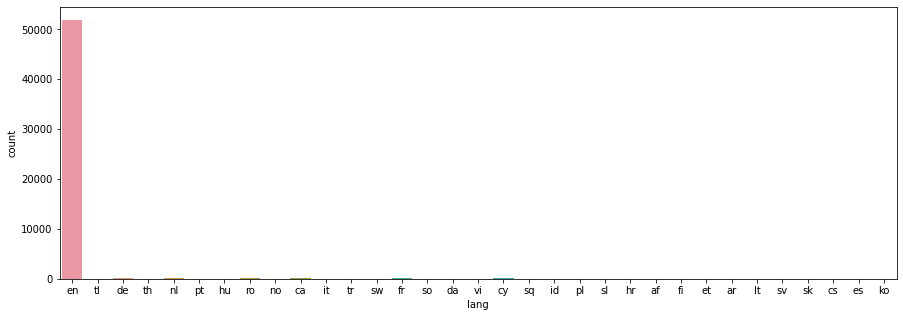

In [154]:
fig,ax = plt.subplots(figsize=(15,5))

sns.countplot(x="lang", data=data, ax=ax);
print('Total Language:', data.lang.nunique())

There is 33 language used for tweets. we will use only english language.

In [155]:
data = data[(data.lang == 'en')]
data

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,random_sample,lang
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False,Yes,en
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False,Yes,en
23,Alex Jiménez,"Las Vegas, NV",Chief Strategy Officer @Extractable #Fintech #...,2012-04-25 15:26:53,14469.0,822,40097,True,2021-02-10 23:45:03,#Bitcoin’s Rally Signals the Rise of Digital A...,['Bitcoin'],Hootsuite Inc.,False,Yes,en
44,FinTech News Hub,United States,FinTech News Hub is a Blockchain and Cryptocur...,2016-09-29 12:32:04,348.0,126,638,False,2021-02-10 23:33:55,Our featured article for today! Please don't f...,NaN,Paper.li,False,Yes,en
47,Tonya Barris,NaN,NaN,2020-12-29 16:55:33,0.0,16,2,False,2021-02-10 23:32:35,Who want to learn about Forex trading and join...,"['forex', 'forexsignals', 'trading', 'forextra...",Twitter for iPhone,False,Yes,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569336,Emilio3r ⚡LOCK MEX MONSTA⚡,trois-rivières,"Enthousiaste de la crypto, de la bière de micr...",2010-09-30 18:10:30,149.0,347.0,2685.0,False,2022-03-14 19:40:26,"2- recession: the economical shift is coming, ...","['BTC', 'bitcoin']",Twitter for Android,False,Yes,en
2569345,al_riba,NaN,"Matematik Öğretmeni, Teknoloji meraklısı, Epey...",2014-02-28 19:15:54,202.0,205.0,8332.0,False,2022-03-14 19:39:50,"@LadyofCrypto1 We're going to the moon, don't ...","['MetaverseVR', 'MEVR', 'bazılarıMetaverseVR',...",Twitter for Android,False,Yes,en
2569357,SOUNDSM,NaN,близнец,2021-09-10 17:47:34,8.0,81.0,80.0,False,2022-03-14 19:38:53,🛑Let's stop the war together!🛑\n📡Proceeds from...,"['Binance', 'ETH', 'BTC', 'raribleNFTs', 'NFTs...",Twitter Web App,False,Yes,en
2569371,HODL never SODL 丰 🇸🇻 🍌🍞,El Salvador,HODLer of last resort & unlicensed node operat...,2020-08-12 10:31:54,4315.0,2448.0,107327.0,False,2022-03-14 19:37:46,@patrickluberus @WhyyBitcoin @sathoarder @LOST...,"['BTC', 'Bitcoin']",Twitter Web App,False,Yes,en


In [156]:
from tqdm import tnrange, tqdm_notebook, tqdm

In [157]:
#clean df 
def cleaning(data):
    text = re.sub(r'http\S+',' ', data)  #remove urls
    text = re.sub(r'@\w+',' ', text) #remove mentions
    text = re.sub(r'#\w+', ' ', text) #remove hashtag
    text = re.sub('[^A-Za-z]+', ' ', text) #remove characters that not use in the english alphabets
    text = text.lower() #lower caps
    text = re.sub('\w*\d\w*','', text) #remove digit
    

    return text

In [158]:
data['cleaned_text'] = data['text'].apply(cleaning)
data['cleaned_text']

6                                        lt fire amp man gt 
8           rsr i know i told you guys the target was i k...
23          s rally signals the rise of digital assets th...
44         our featured article for today please don t fo...
47         who want to learn about forex trading and join...
                                 ...                        
2569336     recession the economical shift is coming the ...
2569345               we re going to the moon don t be late 
2569357     let s stop the war together proceeds from the...
2569371     the majority of users will be just watching t...
2569372                                            done sir 
Name: cleaned_text, Length: 51877, dtype: object

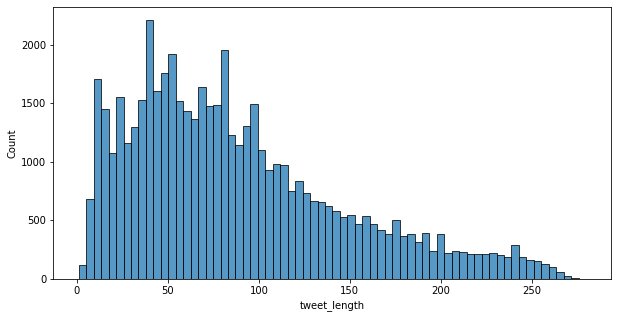

In [159]:
data["tweet_length"] = data["cleaned_text"].apply(len)
fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(data=data, x="tweet_length");

mean of num word: 16.390828305414733
min of num words: 0
max of num word: 65


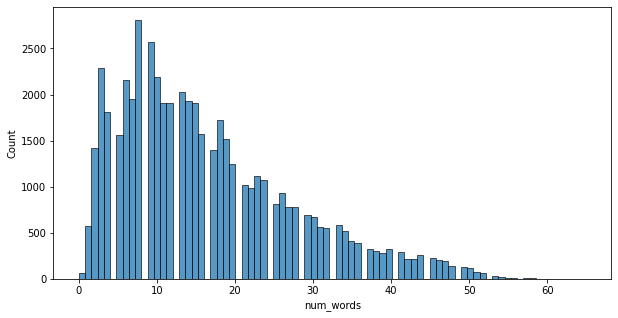

In [160]:
def count_words(x):
    return len(x.split())

data["num_words"] = data["cleaned_text"].apply(count_words)
fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(data=data, x="num_words");
print('mean of num word:', data.num_words.mean())
print('min of num words:',min(data["num_words"]))
print('max of num word:',max(data["num_words"]) )

## common words with wordcloud

In [161]:
from wordcloud import WordCloud, STOPWORDS

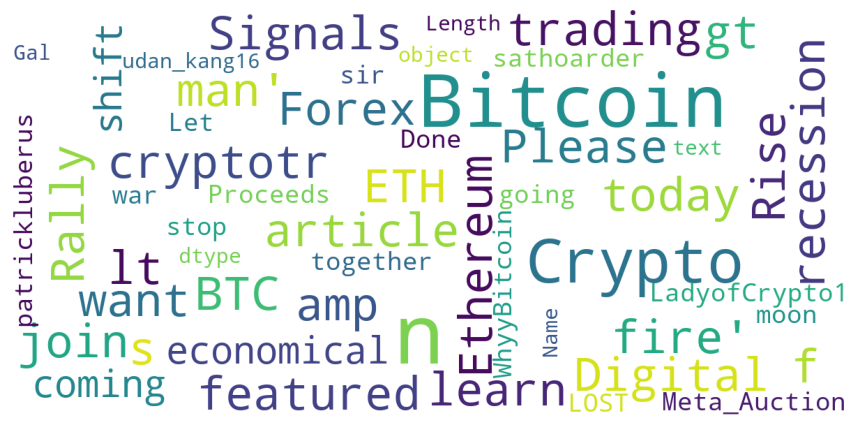

In [162]:
stopwords = set(STOPWORDS)

def wc(data,title= None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words = 100,
        max_font_size = 40,
        scale= 3,
        random_state = 1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()


wc(data['text'])


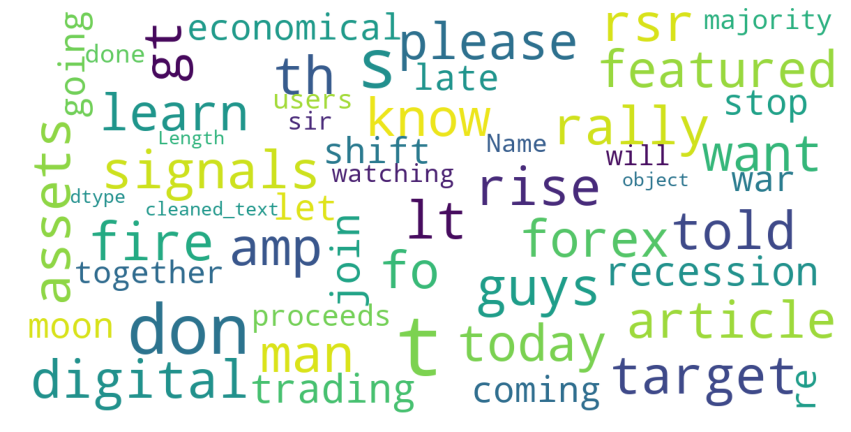

In [163]:
wc(data['cleaned_text'])

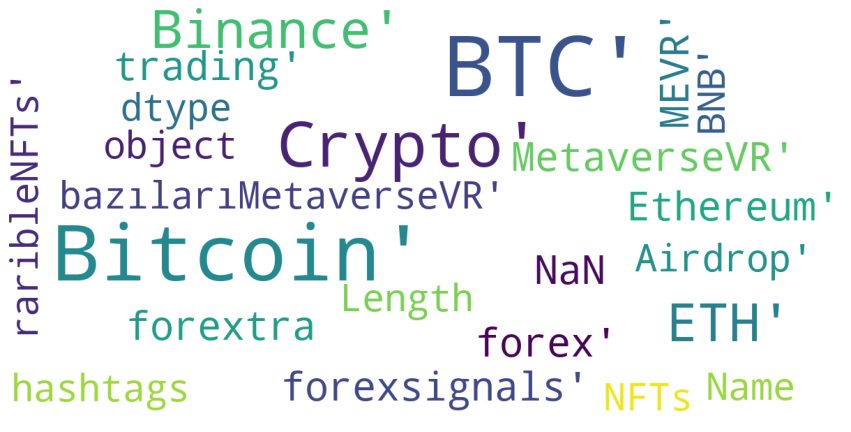

In [164]:
wc(data['hashtags'])

## Sentiment analysis

In [165]:
import nltk

In [166]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [167]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [168]:
sid = SentimentIntensityAnalyzer()

In [169]:
data['vader'] = data['text'].apply(lambda desc: sid.polarity_scores(desc))

In [170]:
data['compound'] = data['vader'].apply(lambda score_dict: score_dict['compound'])
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,random_sample,lang,cleaned_text,tweet_length,num_words,vader,compound
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False,Yes,en,lt fire amp man gt,20,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False,Yes,en,rsr i know i told you guys the target was i k...,53,13,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
23,Alex Jiménez,"Las Vegas, NV",Chief Strategy Officer @Extractable #Fintech #...,2012-04-25 15:26:53,14469.0,822,40097,True,2021-02-10 23:45:03,#Bitcoin’s Rally Signals the Rise of Digital A...,['Bitcoin'],Hootsuite Inc.,False,Yes,en,s rally signals the rise of digital assets th...,79,16,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.1779
44,FinTech News Hub,United States,FinTech News Hub is a Blockchain and Cryptocur...,2016-09-29 12:32:04,348.0,126,638,False,2021-02-10 23:33:55,Our featured article for today! Please don't f...,NaN,Paper.li,False,Yes,en,our featured article for today please don t fo...,91,16,"{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'comp...",0.5037
47,Tonya Barris,NaN,NaN,2020-12-29 16:55:33,0.0,16,2,False,2021-02-10 23:32:35,Who want to learn about Forex trading and join...,"['forex', 'forexsignals', 'trading', 'forextra...",Twitter for iPhone,False,Yes,en,who want to learn about forex trading and join...,60,12,"{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'comp...",0.7650


In [171]:
data['sentiment_vader'] = ''
data.loc[data.compound>0, 'sentiment_vader']='POSITIVE'
data.loc[data.compound==0, 'sentiment_vader']='NEUTRAL'
data.loc[data.compound<0, 'sentiment_vader']='NEGATIVE'

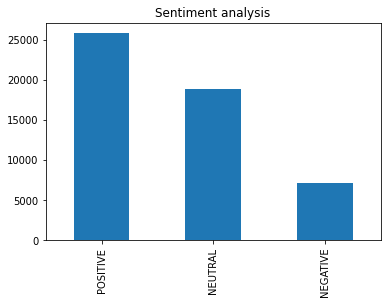

In [172]:
data.sentiment_vader.value_counts().plot(kind='bar', title='Sentiment analysis');

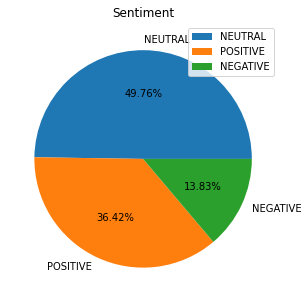

In [173]:
fig,ax = plt.subplots(figsize=(10,5))
plt.pie(data.sentiment_vader.value_counts(),labels=data.sentiment_vader.unique(), autopct='%.2f%%')
ax.set_title('Sentiment')
plt.legend()

In [174]:
data.to_csv('sampling_fp.csv')

# DATA PREPROCESSING

In [175]:
#split dataset
X = data['cleaned_text']
y= pd.get_dummies(data['sentiment_vader']).values

In [176]:
X

6                                        lt fire amp man gt 
8           rsr i know i told you guys the target was i k...
23          s rally signals the rise of digital assets th...
44         our featured article for today please don t fo...
47         who want to learn about forex trading and join...
                                 ...                        
2569336     recession the economical shift is coming the ...
2569345               we re going to the moon don t be late 
2569357     let s stop the war together proceeds from the...
2569371     the majority of users will be just watching t...
2569372                                            done sir 
Name: cleaned_text, Length: 51877, dtype: object

In [177]:
y

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
#split to train adnd test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=16)

#split to train and val set
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=16)

## Tokenisasi

In [180]:
# function for tokenization
from nltk.tokenize import word_tokenize
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

In [181]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#function stopwords
def remove_stopwords(text):
    output = [i for i in text if i not in stop_words]
    return output

In [182]:
from nltk.stem import WordNetLemmatizer

#defining the object for Lemmatization
word_lemmatizer = WordNetLemmatizer()

#function of lemmatization
def lemmatizer(text):
    lemma = [word_lemmatizer.lemmatize(word) for word in text]
    return lemma

In [183]:
#make a function of preprocess
def cleaned(text):
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

In [184]:
X_train_c = X_train.copy()

In [185]:
X_test_c = X_test.copy()
X_val_c = X_val.copy()

In [186]:
X_train_token = X_train_c.apply(lambda row: cleaned(row))

In [187]:
X_val_token = X_val_c.apply(lambda row: cleaned(row))
X_test_token = X_test_c.apply(lambda row: cleaned(row))

## Label Encoder

In [188]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [189]:
import tensorflow as tf

In [190]:
from tensorflow.keras.utils import to_categorical

In [191]:
y_train_c = y_train.copy()
y_test_c = y_test.copy()
y_val_c = y_val.copy()

In [192]:
y_train_c

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

## Vektorisasi

In [193]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

t = Tokenizer(oov_token='UNK')
t.fit_on_texts(X_train_token)

In [194]:
#Turns string into lists of integer indices
X_train_seq = t.texts_to_sequences(X_train_token)
X_val_seq = t.texts_to_sequences(X_val_token)
X_test_seq = t.texts_to_sequences(X_test_token)

In [195]:
# show the vocab
word_index = t.word_index
print('Found %s unique tokens.' % len(word_index))

Found 21199 unique tokens.


In [196]:
# defining max length
tem = 0
for i in range(len(X_train_seq)):
    tem += len(X_train_seq[i])
maxlenght = int(tem/len(X_train_seq))
print(maxlenght)

9


In [197]:
X_train_done = pad_sequences(X_train_seq, maxlen = maxlenght, padding = 'post')
X_val_done = pad_sequences(X_val_seq, maxlen = maxlenght, padding = 'post')
X_test_done = pad_sequences(X_test_seq, maxlen = maxlenght, padding = 'post')

# MODEL DEFINITION

In [198]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Flatten, Input

model = Sequential([
                    Embedding(21200, 128, input_length=maxlenght),
                    LSTM(200, return_sequences=True),
                    LSTM(100),
                    Dense(3, activation='softmax')
])

In [199]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 9, 128)            2713600   
                                                                 
 lstm_6 (LSTM)               (None, 9, 200)            263200    
                                                                 
 lstm_7 (LSTM)               (None, 100)               120400    
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 3,097,503
Trainable params: 3,097,503
Non-trainable params: 0
_________________________________________________________________


# MODEL TRAINING

In [200]:
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy']
)

In [201]:
train = model.fit(X_train_done,y_train_c,epochs=10,validation_data=(X_val_done,y_val_c))

Epoch 1/10
1168/1168 [==============================] - 43s 34ms/step - loss: 0.4849 - accuracy: 0.8090 - val_loss: 0.3767 - val_accuracy: 0.8567
Epoch 2/10
1168/1168 [==============================] - 36s 31ms/step - loss: 0.2606 - accuracy: 0.9087 - val_loss: 0.3859 - val_accuracy: 0.8624
Epoch 3/10
1168/1168 [==============================] - 36s 31ms/step - loss: 0.1783 - accuracy: 0.9384 - val_loss: 0.4521 - val_accuracy: 0.8588
Epoch 4/10
1168/1168 [==============================] - 37s 31ms/step - loss: 0.1236 - accuracy: 0.9588 - val_loss: 0.5140 - val_accuracy: 0.8555
Epoch 5/10
1168/1168 [==============================] - 37s 32ms/step - loss: 0.0888 - accuracy: 0.9689 - val_loss: 0.5823 - val_accuracy: 0.8518
Epoch 6/10
1168/1168 [==============================] - 34s 29ms/step - loss: 0.0620 - accuracy: 0.9790 - val_loss: 0.7127 - val_accuracy: 0.8468
Epoch 7/10
1168/1168 [==============================] - 36s 31ms/step - loss: 0.0479 - accuracy: 0.9837 - val_loss: 0.8107 -

In [202]:
metrics =pd.DataFrame(train.history) #history kedua untuk mengakses history
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.484902,0.809050,0.376652,0.856661
1,0.260646,0.908675,0.385941,0.862443
2,0.178312,0.938367,0.452115,0.858829
3,0.123599,0.958849,0.513959,0.855457
4,0.088847,0.968889,0.582309,0.851843


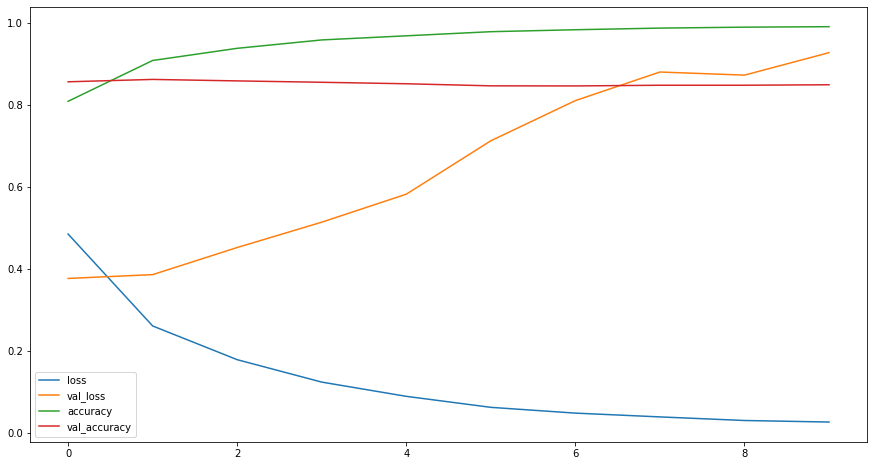

In [203]:
metrics[['loss','val_loss','accuracy','val_accuracy']].plot(figsize=(15,8));

# MODEL EVALUATION

In [221]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred =np.argmax(model.predict(X_test_done),axis =1)

print(classification_report(np.argmax(y_test_c,axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.72      0.65      0.69      1469
           1       0.88      0.85      0.87      3808
           2       0.86      0.90      0.88      5099

    accuracy                           0.85     10376
   macro avg       0.82      0.80      0.81     10376
weighted avg       0.85      0.85      0.85     10376



In [223]:
y_test_arg = np.argmax(y_test_c,axis=1)


cf = confusion_matrix(y_test_arg, y_pred)

In [224]:
cf

array([[ 955,  166,  348],
       [ 141, 3248,  419],
       [ 222,  281, 4596]], dtype=int64)

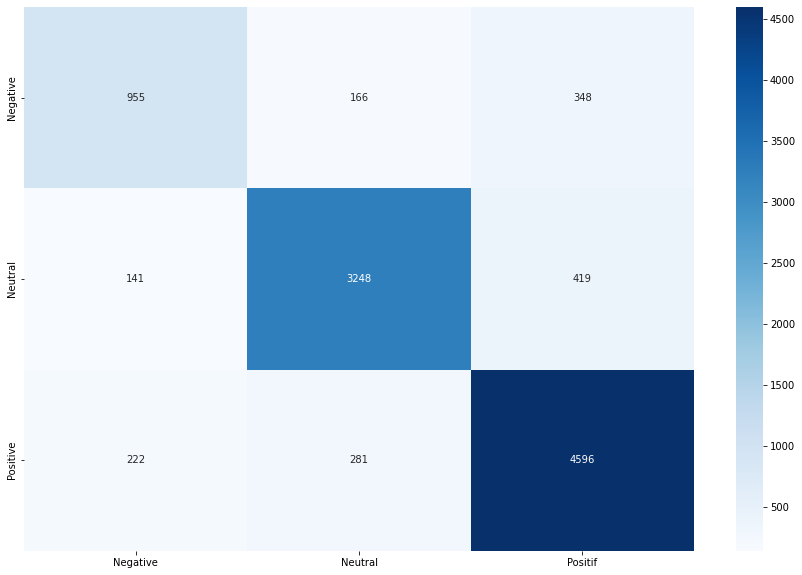

In [227]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(cf, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(['Negative','Neutral', 'Positif'])
ax.set_yticklabels(['Negative','Neutral', 'Positive'])
plt.show()